In [7]:
# https://github.com/tallesfelix/directions-with-osm-networkx/blob/master/Creating%20routes%20with%20networkx%20and%20ipyleaflet.ipynb
import networkx as nx
import osmnx as ox
from shapely.geometry import LineString, mapping
import geopandas as gpd
from ipyleaflet import *

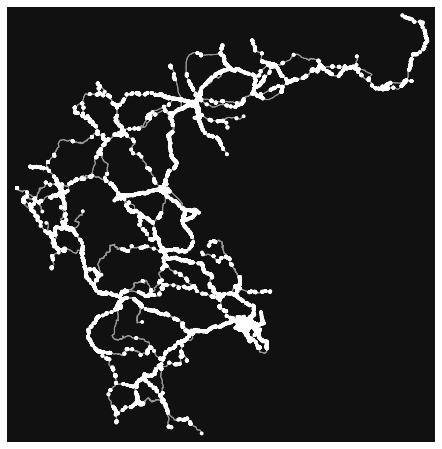

In [2]:
place_name = "Greece"
ox.config(use_cache=True, log_console=True)
#cf = '["highway"~"motorway|motorway_link|trunk|secondary|primary"]'
cf = '["highway"~"motorway|motorway_link|trunk|trunk_link|primary|primary_link"]'
#cf = '["highway"~"motorway|motorway_link"]'
greece_graph = ox.graph_from_place(place_name, network_type='drive', custom_filter=cf)
#fig, ax = ox.plot_graph(graph)
greece_nodes, greece_edges = ox.graph_to_gdfs(greece_graph)

In [3]:
dest_graph_fpath = '/home/blaxeep/workspace/osm_project/results/graphs/'
cities = ['Regional Unit of North Athens','Regional Unit of West Athens','Regional Unit of Central Athens','Regional Unit of South Athens','Regional Unit of East Attica','Municipality of Piraeus','Lesbos Regional Unit','Ikaria Regional Unit','Chios Regional Unit','Rhodes Regional Unit','Tinos Regional Unit','Heraklion Regional Unit','Lasithi Regional Unit','Rethymno Regional Unit','Chania Regional Unit','Evros Regional Unit','Xanthi Regional Unit','Rodopi Regional Unit','Drama Regional Unit','Kavala Regional Unit','Imathia Regional Unit','Thessaloniki Regional Unit','Kilkis Regional Unit','Pella Regional Unit','Pieria Regional Unit','Serres Regional Unit','Chalkidiki Regional Unit','Kozani Regional Unit','Kastoria Regional Unit','Florina Regional Unit','Arta Regional Unit','Thesprotia Regional Unit','Ioannina Regional Unit','Karditsa Regional Unit','Larisa Regional Unit','Regional Unit of Magnesia','Zakynthos Regional Unit','Corfu Regional Unit','Kefallonia Regional Unit','Lefkada Regional Unit','Aetolia-Acarnania Regional Unit','Achaea Regional Unit','Elis Regional Unit','Regional Unit of Boeotia','Euboea Regional Unit','Regional Unit of Evrytania','Phthiotis Regional Unit','Regional Unit of Phocis','Argos Regional Unit','Corinthia Regional Unit','Laconia Regional Unit']
cf = '["highway"~"motorway|motorway_link|trunk|trunk_link|primary|primary_link|secondary|secondary_link"]'
for city in cities:
    print("now city is ", city)
    try:
        zogr_graph = ox.graph_from_place(str(city), network_type='drive', custom_filter=cf)
        zogr_nodes, zogr_edges = ox.graph_to_gdfs(zogr_graph)
        destination = dest_graph_fpath + str(city) +str('-secondary.graphml')
        ox.save_graphml(zogr_graph, destination)
    except ValueError:
        print("failure!")

now city is  Regional Unit of North Athens
now city is  Regional Unit of West Athens
now city is  Regional Unit of Central Athens
now city is  Regional Unit of South Athens
now city is  Regional Unit of East Attica
now city is  Municipality of Piraeus
now city is  Lesbos Regional Unit
now city is  Ikaria Regional Unit
now city is  Chios Regional Unit
now city is  Rhodes Regional Unit
now city is  Tinos Regional Unit
now city is  Heraklion Regional Unit
now city is  Lasithi Regional Unit
now city is  Rethymno Regional Unit
now city is  Chania Regional Unit
now city is  Evros Regional Unit
now city is  Xanthi Regional Unit
now city is  Rodopi Regional Unit
now city is  Drama Regional Unit
now city is  Kavala Regional Unit
now city is  Imathia Regional Unit
now city is  Thessaloniki Regional Unit
now city is  Kilkis Regional Unit
now city is  Pella Regional Unit
now city is  Pieria Regional Unit
now city is  Serres Regional Unit
now city is  Chalkidiki Regional Unit
now city is  Kozani Re

In [6]:
dest_graph_fpath = '/home/blaxeep/workspace/osm_project/results/graphs/'
G_all = greece_graph
cities = ['Regional Unit of North Athens','Regional Unit of West Athens','Regional Unit of Central Athens','Regional Unit of South Athens','Regional Unit of East Attica','Municipality of Piraeus','Lesbos Regional Unit','Ikaria Regional Unit','Chios Regional Unit','Rhodes Regional Unit','Tinos Regional Unit','Heraklion Regional Unit','Lasithi Regional Unit','Rethymno Regional Unit','Chania Regional Unit','Evros Regional Unit','Xanthi Regional Unit','Rodopi Regional Unit','Drama Regional Unit','Kavala Regional Unit','Imathia Regional Unit','Thessaloniki Regional Unit','Kilkis Regional Unit','Pella Regional Unit','Pieria Regional Unit','Serres Regional Unit','Chalkidiki Regional Unit','Kozani Regional Unit','Kastoria Regional Unit','Florina Regional Unit','Arta Regional Unit','Thesprotia Regional Unit','Ioannina Regional Unit','Karditsa Regional Unit','Larisa Regional Unit','Regional Unit of Magnesia','Zakynthos Regional Unit','Corfu Regional Unit','Kefallonia Regional Unit','Lefkada Regional Unit','Aetolia-Acarnania Regional Unit','Achaea Regional Unit','Elis Regional Unit','Regional Unit of Boeotia','Euboea Regional Unit','Regional Unit of Evrytania','Phthiotis Regional Unit','Regional Unit of Phocis','Argos Regional Unit','Corinthia Regional Unit','Laconia Regional Unit']
for city in cities:
    local_path = dest_graph_fpath + str(city) +str('.graphml')
    local_graph = ox.load_graphml(local_path)
    G_all = nx.compose(G_all, local_graph)
supergraph_dest = '../results/giorgos_regional_graph-secondary.graphml'
ox.save_graphml(G_all, supergraph_dest)
all_nodes, all_edges = ox.graph_to_gdfs(G_all)
print(len(all_nodes), len(all_edges))

FileNotFoundError: [Errno 2] No such file or directory: '/home/blaxeep/workspace/osm_project/results/graphs/Lesbos Regional Unit.graphml'

In [ ]:
nodes, edges = ox.graph_to_gdfs(G_all)
center = (37.714155,24.056792)
m = Map(center=center, basemap=basemaps.CartoDB.Positron, zoom=8)

to_marker_style = AwesomeIcon(
    name='circle',
    icon_color='white',
    marker_color='red',
    spin=False
)
from_marker = Marker(location=center)
print(from_marker)
to_marker = Marker(location=center, icon=to_marker_style)

def set_nearest_node(marker):
    marker.nearest_node = ox.get_nearest_node(G3, marker.location)
    return

path_layer_list = []

def handle_change_location(event, marker):
    event_owner = event['owner']
    event_owner.nearest_node = ox.get_nearest_node(G3, event_owner.location)
    marker.neares_node = ox.get_nearest_node(G3, marker.location)
    
    shortest_path = nx.dijkstra_path(G3, event_owner.nearest_node, marker.neares_node, 
                                     weight='length')
    
    if len(path_layer_list) == 1:
        m.remove_layer(path_layer_list[0])
        path_layer_list.pop()
    
    shortest_path_points = nodes.loc[shortest_path]
    path = gpd.GeoDataFrame([LineString(shortest_path_points.geometry.values)], columns=['geometry'])
    path_layer = GeoData(geo_dataframe=path, style={'color':'black', 'weight':2})
    m.add_layer(path_layer)
    path_layer_list.append(path_layer)
    
    
    
from_marker.observe(lambda event: handle_change_location(event, to_marker), 'location')
to_marker.observe(lambda event: handle_change_location(event, from_marker), 'location')

m.add_layer(from_marker)
m.add_layer(to_marker)
set_nearest_node(from_marker)
set_nearest_node(to_marker)
m

In [ ]:
print("Κοντινότερος κόμβος: ", to_marker.nearest_node)
print("Αριθμός κόμβων και συνδέσμων του δικτύου αντίστοιχα", len(nodes), len(edges))

In [ ]:
num = nx.strongly_connected_components(G_all)
connected_components = sum(1 for x in num)
print(connected_components)
z = ox.utils_graph.remove_isolated_nodes(G_all)

num = nx.strongly_connected_components(z)
connected_components = sum(1 for x in num)
print(connected_components)